# Cross-Validation

Steps:
- Split dataset into k parts
- Train the model on k-1 subsets
- Test on the remaining subset
- Repeat k times - each time using different subset
- Take the average accuracy (or error) across all subsets

Best score: 5
Worst score: 100


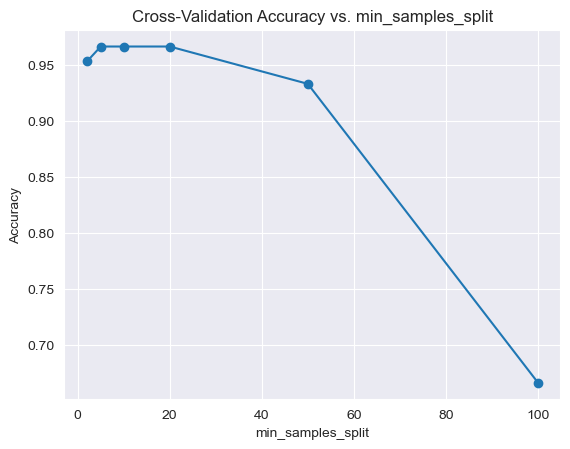

In [24]:
from os.path import split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

data = load_iris()
X = data.data
y = data.target



values = [2, 5, 10, 20, 50, 100]
scores = []

for v in values:
    model = DecisionTreeClassifier(min_samples_split=v, random_state = 42)
    cv_score = cross_val_score(model, X, y, cv=5)
    scores.append(cv_score.mean())
best_value = values[np.argmax(scores)]
worst_value = values[np.argmin(scores)]

print("Best score:", best_value)
print("Worst score:", worst_value)

plt.plot(values, scores, marker='o')
plt.title("Cross-Validation Accuracy vs. min_samples_split")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.show()


#### Clustering with the Iris Dataset


D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

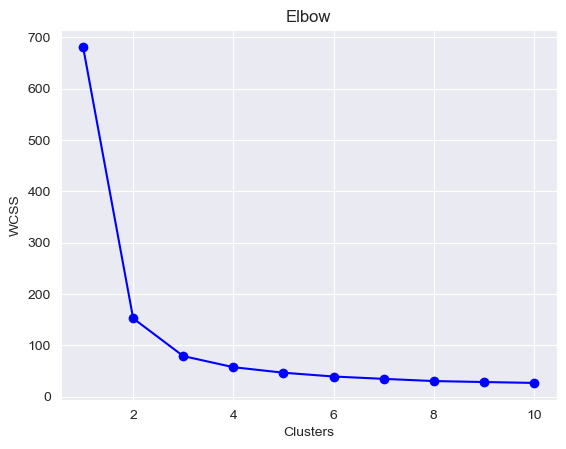

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


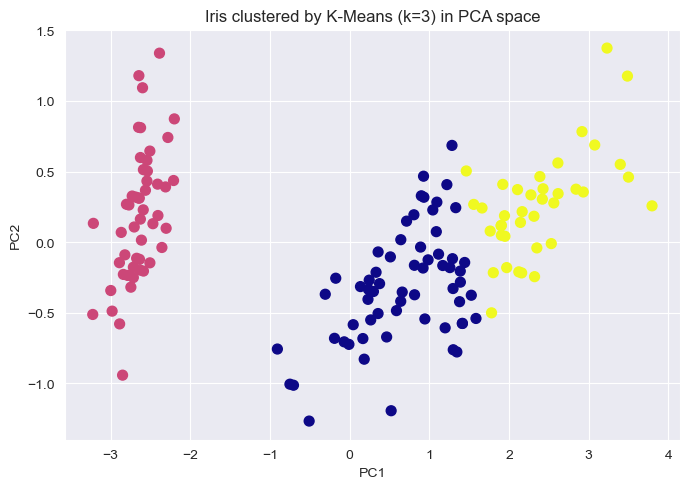

In [28]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# data = load_iris()
# X = data.data
# y_true = data.target
#
# kmeans = KMeans(n_clusters=3, random_state=42)
# kmeans.fit(X)
#
# y_kmeans = kmeans.labels_

data = load_iris()
x = data.data
feature_names = data.feature_names
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init = "k-means++", n_init=10, random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss, 'bo-')
plt.title("Elbow")
plt.xlabel("Clusters")
plt.ylabel("WCSS")
plt.show()

kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state = 42)
y_kmeans = kmeans.fit_predict(x)

pca = PCA(n_components=2)
X2 = pca.fit_transform(X)


plt.figure(figsize=(7, 5))
plt.scatter(X2[:, 0], X2[:, 1], c=y_kmeans,cmap='plasma', s=50)
plt.title("Iris clustered by K-Means (k=3) in PCA space")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.tight_layout()
plt.show()



#### Decision Tree

Best split:  5
Test accuracy: 0.9210526315789473
Confusion matrix:
 [[12  0  0]
 [ 0 12  1]
 [ 0  2 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.86      0.92      0.89        13
   virginica       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38

petal length (cm): 0.952
petal width (cm): 0.048
sepal length (cm): 0.000
sepal width (cm): 0.000


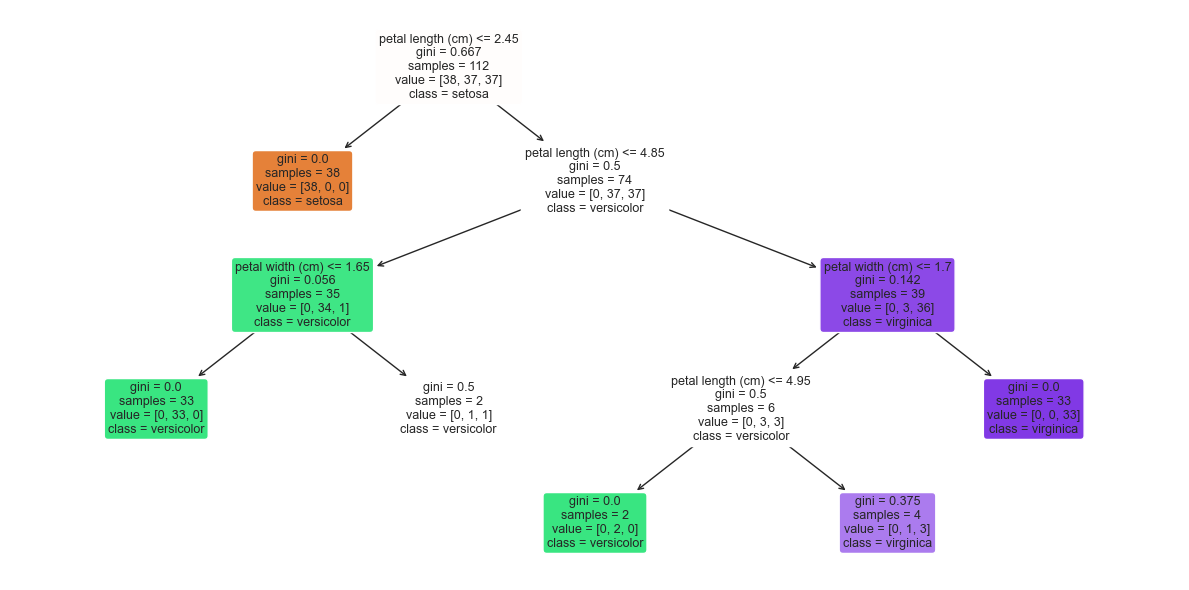

In [31]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np

data = load_iris()
X, y = data.data, data.target
feature_names = data.feature_names
class_names = data.target_names

values = [2, 5, 10, 20, 50, 100]
scores = []
for v in values:
    model = DecisionTreeClassifier(min_samples_split=v, random_state = 42)
    scores.append(cross_val_score(model, X, y, cv=5).mean())
best_split = values[int(np.argmax(scores))]
print("Best split: ", best_split)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state=42)

tree = DecisionTreeClassifier(min_samples_split=best_split,max_depth=None, min_samples_leaf=1,
  random_state = 42)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=class_names))

for name, imp in sorted(zip(feature_names, tree.feature_importances_), key=lambda x: -x[1]):
    print(f"{name}: {imp:.3f}")
plt.figure(figsize=(12, 6))
plot_tree(
    tree,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True,
    fontsize=9
)
plt.tight_layout()
plt.show()


#### Decision Tree Predicting Numbers (Regressor)


   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94
112012.63920000002
   R&D Spend  Administration  Marketing Spend  State_Florida  State_New York
0  165349.20       136897.80        471784.10              0               1
1  162597.70       151377.59        443898.53              0               0
2  153441.51       101145.55        407934.54              1               0
3  144372.41       118671.85        383199.62              0               1
4  142107.34        91391.77        366168.42              1               0
Best split:  5
Mean absolute error:  8860.42
R2 score:  0.878


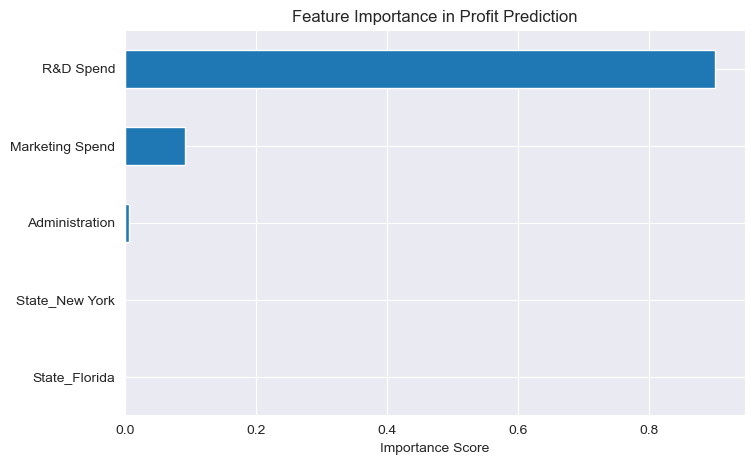

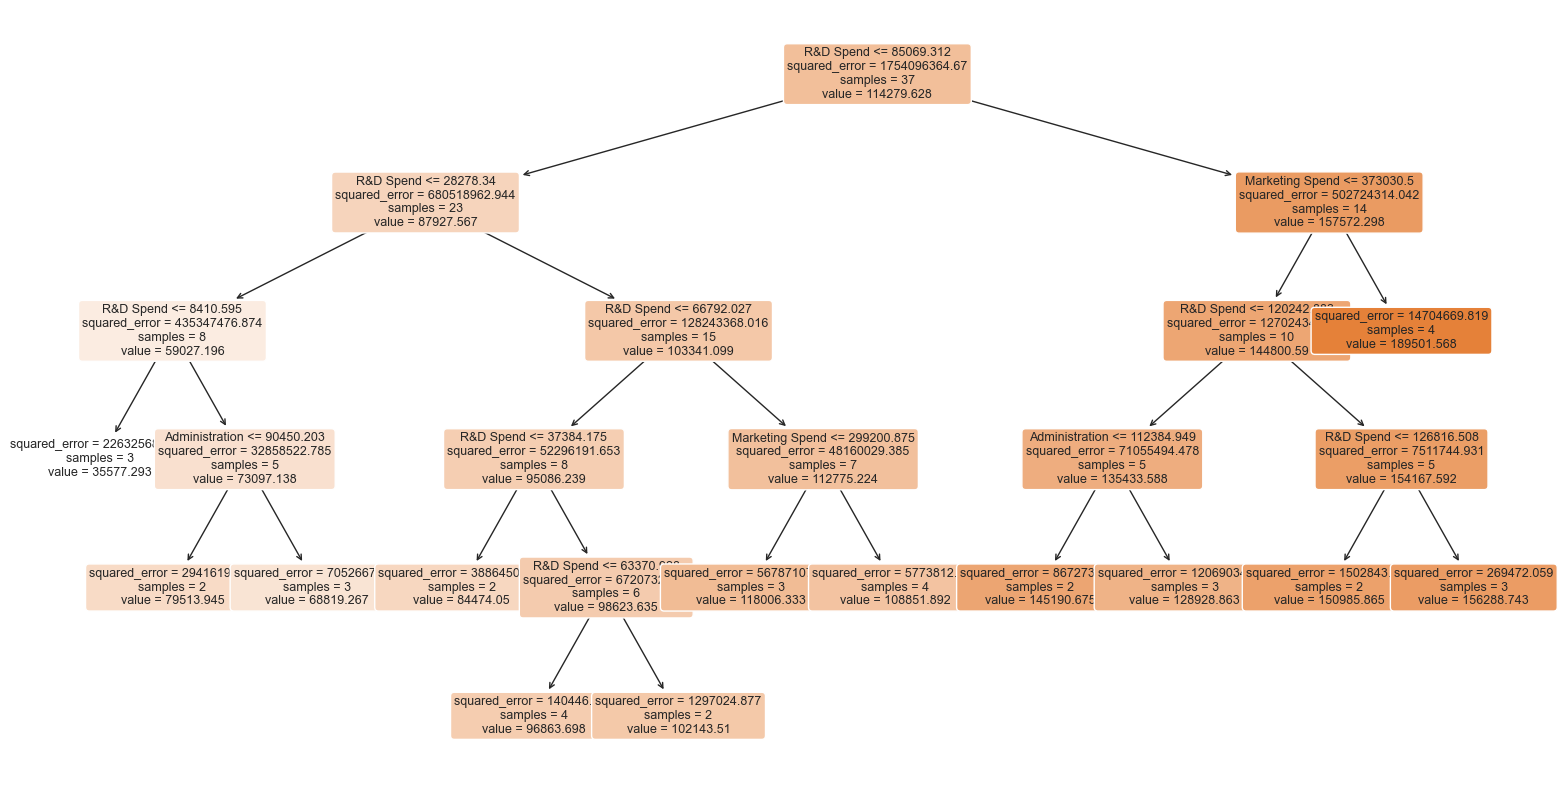

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder

data = pd.read_csv("50_Startups.csv") # Import data

print(data.head())

X = data.drop("Profit", axis=1) # Every column besides Profit goes to X
y = data["Profit"] # Assign profit column to Y (to predict)
print(y.mean())
X = pd.get_dummies(X, drop_first=True) # Convert categorical to binary values
print(X.head())
values = [2, 5, 10, 20, 50, 100]
scores = []
for v in values:
    model = DecisionTreeRegressor(min_samples_split=v, random_state = 42)
    scores.append(cross_val_score(model, X, y, cv=5).mean())
best_split = values[int(np.argmax(scores))]
print("Best split: ", best_split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42) # Splits data 75% train/25% test

model = DecisionTreeRegressor(max_depth=6, min_samples_split=5, random_state=42) # Decision tree

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean absolute error: " , round(mae,2))
print("R2 score: ", round(r2,3))

import matplotlib.pyplot as plt

feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp.sort_values(ascending=True).plot.barh(figsize=(8,5))
plt.title("Feature Importance in Profit Prediction")
plt.xlabel("Importance Score")
plt.show()


plt.figure(figsize=(16, 8))
plot_tree(
    model,                      # your trained DecisionTreeRegressor
    feature_names=X.columns,    # column names (optional, but helps)
    filled=True,                # color the boxes by prediction value
    rounded=True,               # rounded corners, easier to read
    fontsize=9                  # text size
)
plt.tight_layout()
plt.show()

